In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import peakutils
import math
#from moviepy.editor import *
import cv2
import scipy.stats as stats
#important for text to be detected when importing saved figures into illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42

In [ ]:
rootpath = r"...\Data\Figure S11"
figurepath = os.path.join(rootpath,"figure")
metapath = os.path.join(rootpath,"meta")
datapath = os.path.join(rootpath,"data")
statspath = os.path.join(rootpath,"stats")
for x in [figurepath,datapath,metapath,statspath]:
    if not os.path.exists(x):
        os.mkdir(x)

In [4]:
metainfo = pd.read_csv(os.path.join(metapath,'Self_paced_mating_metainfo.csv'),index_col = False)


In [5]:
import pickle
with open(os.path.join(metapath,"parameter_dict.pickle"),'rb') as handle:
    parameter_dict = pickle.load(handle)


In [6]:
# Load the data
# merge_df is a concatenated data frame of all DeepLabCut tracking data processed in ROI analysis.
merge_df = pd.read_csv(os.path.join(datapath,"merge_df.csv"),index_col = None)

# group_df contains grouped data for each experiment.
# Average time spent in each zone was average across all zone duration
# The other values were summed
group_df = pd.read_csv(os.path.join(datapath,"group_df.csv"))


In [ ]:
# Excel file to store statistical values for manuscript
manuscript_statistic_filepath = os.path.join(r"...\meta","manuscript_statistic.csv")
manuscript_statistic_file = pd.read_csv(manuscript_statistic_filepath,index_col = False)

# Figure S11C

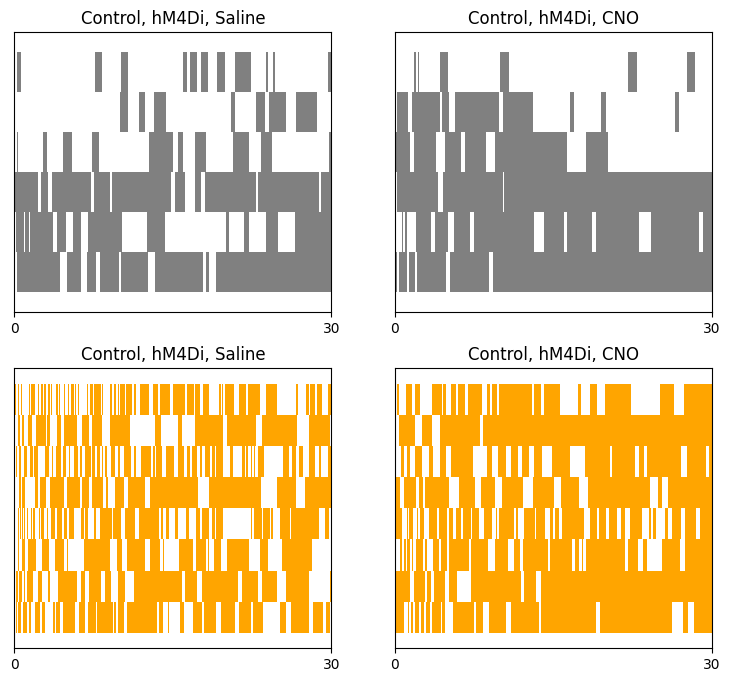

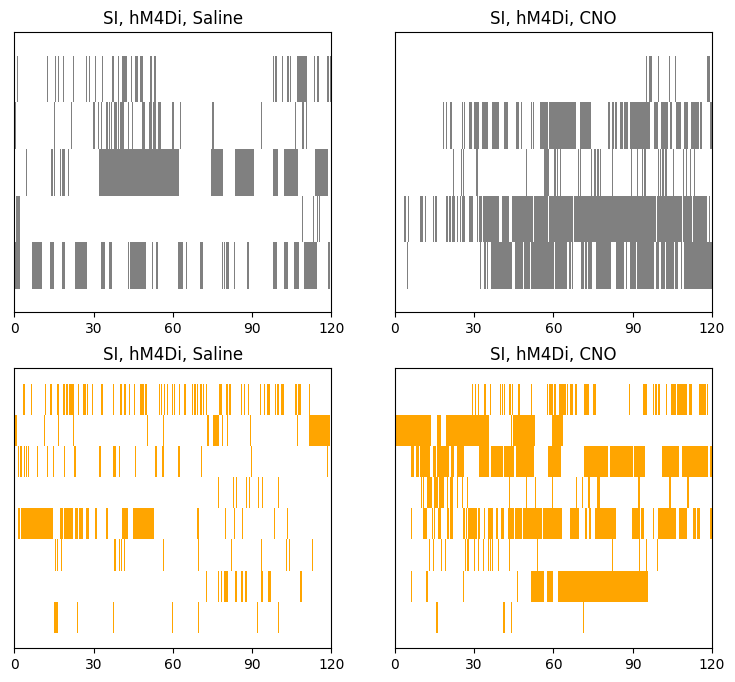

In [8]:
# Plot raster plot showing time in interaction zone
Experiment_type = 'Control'
Group = 'hM4Di' 
State = 'CNO'
Type = 'Interaction_zone'
for Experiment_type in ['Control','SI']:
    fig,ax = plt.subplots(2,2,figsize = (3*3,4*2))

    for gidx, Stim_Group in enumerate(['Post_ejaculatory_eYFP','Post_ejaculatory_hM4Di']):
        for sidx,State in enumerate(['Saline','CNO']):
            tempdf = metainfo[(metainfo.Experiment_type == Experiment_type)&(metainfo.Stim_Group == Stim_Group)\
                                 &(metainfo.State == State)]
            if Stim_Group == 'Post_ejaculatory_eYFP':
                color = 'gray'
            elif Stim_Group == 'Post_ejaculatory_hM4Di':
                color = 'orange'                
            axs = ax[gidx,sidx,]

            for idx,filename in enumerate(tempdf.sort_values(by = 'ID').filename):
                
                subsetdf = merge_df[(merge_df.filename == filename)&(merge_df.Type == Type)]
                #if Experiment_type == 'SI':
                #    print(subsetdf.head())
                [axs.fill_betweenx([idx-0.5,idx + 0.5],x1 = entry,x2 = exit,color = color,alpha = 1,lw = 0) for entry,exit in \
                 subsetdf.loc[subsetdf.Type == Type,['Entry_frame','Exit_frame']].values]
            Offset_frame = metainfo[metainfo.filename == filename].Offset_frame.values[0]//2
            if Offset_frame == 15*60*120:
                nticks = 5
            else:
                nticks = 2

            nanimals = metainfo[(metainfo.Experiment_type == Experiment_type) &(metainfo.Stim_Group == Stim_Group) &(metainfo.State == State)].shape[0]
            axs.set_xticks(np.linspace(0,Offset_frame,nticks))    
            axs.set_xticklabels(np.linspace(0//(15*60),Offset_frame//(15*60),nticks,dtype = 'int'))

            axs.set_yticks([])
            axs.set_ylim(-1, nanimals)
            axs.set_xlim(0, Offset_frame)
            axs.set_title(', '.join([Experiment_type,Group,State]))

    fig.savefig(os.path.join(figurepath,'FigureS11_{}.png'.format(Experiment_type)),bbox_inches='tight',dpi = 216)
    fig.savefig(os.path.join(figurepath,'FigureS11_{}.pdf'.format(Experiment_type)),bbox_inches='tight') 

# Figure S11D

In [9]:
# Figure label
figlabel = 'FigureS11D'


C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7076\286104795.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


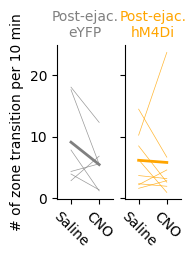

In [10]:
variable = 'Number_of_zone_transition_per_10min'


tempdf = group_df[group_df.Experiment_type == 'SI']

xlen = 2
fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'Post-ejac.\nhM4Di'],['gray','orange'])]
axs[0].set_ylabel('# of zone transition per 10 min')

fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')    


In [11]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Number_of_zone_transition_per_10min
[0.21875, 0.7421875]
Post_ejaculatory_eYFP 0.4375
Post_ejaculatory_hM4Di 1.0


# Figure S11E

In [12]:
# Figure label
figlabel = 'FigureS11E'


C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7076\582280166.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


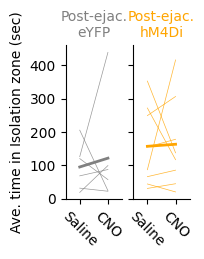

In [13]:
variable = 'Average_Isolation_zone_duration'


tempdf = group_df[group_df.Experiment_type == 'SI']

xlen = 2
fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'Post-ejac.\nhM4Di'],['gray','orange'])]
axs[0].set_ylabel('Ave. time in Isolation zone (sec)')

fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')    


In [14]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Average_Isolation_zone_duration
[0.84375, 0.9453125]
Post_ejaculatory_eYFP 1.0
Post_ejaculatory_hM4Di 1.0


# Figure S11F

In [15]:
# Figure label
figlabel = 'FigureS11F'


C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7076\2079977972.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


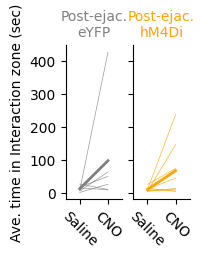

In [16]:
variable = 'Average_Interaction_zone_duration'


tempdf = group_df[group_df.Experiment_type == 'SI']

xlen = 2
fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'Post-ejac.\nhM4Di'],['gray','orange'])]
axs[0].set_ylabel('Ave. time in Interaction zone (sec)')

fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')    


In [17]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Average_Interaction_zone_duration
[0.15625, 0.078125]
Post_ejaculatory_eYFP 0.3125
Post_ejaculatory_hM4Di 0.15625


# Figure S11G

In [18]:
# Figure label
figlabel = 'FigureS11G'


C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7076\1392119279.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


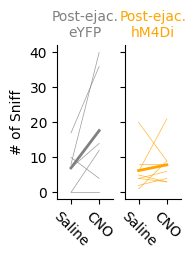

In [19]:
variable = 'Sniff_event'


tempdf = group_df[group_df.Experiment_type == 'SI']

xlen = 2
fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'Post-ejac.\nhM4Di'],['gray','orange'])]
axs[0].set_ylabel('# of Sniff')

fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')    


In [20]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Sniff_event
[0.07961580146011343, 0.495868184540851]
Post_ejaculatory_eYFP 0.15923160292022687
Post_ejaculatory_hM4Di 0.991736369081702


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Figure S11H

In [21]:
# Figure label
figlabel = 'FigureS11H'


C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7076\4203805065.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


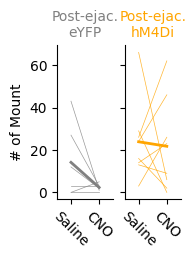

In [22]:
variable = 'Mount_event'


tempdf = group_df[group_df.Experiment_type == 'SI']

xlen = 2
fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'Post-ejac.\nhM4Di'],['gray','orange'])]
axs[0].set_ylabel('# of Mount')

fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')    


In [23]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Mount_event
[0.14412703481601533, 1.0]
Post_ejaculatory_eYFP 0.28825406963203065
Post_ejaculatory_hM4Di 1.0


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Figure S11I

In [24]:
# Figure label
figlabel = 'FigureS11I'


C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7076\3754169890.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


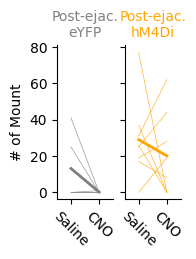

In [25]:
variable = 'Grooming_event'


tempdf = group_df[group_df.Experiment_type == 'SI']

xlen = 2
fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'Post-ejac.\nhM4Di'],['gray','orange'])]
axs[0].set_ylabel('# of Mount')

fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')    


In [26]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Grooming_event
[0.14412703481601533, 0.7421875]
Post_ejaculatory_eYFP 0.28825406963203065
Post_ejaculatory_hM4Di 1.0


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Figure S11J

In [27]:
# Figure label
figlabel = 'FigureS11J'


C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7076\482762528.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


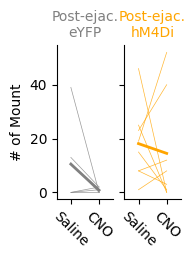

In [28]:
variable = 'Intromission_event'


tempdf = group_df[group_df.Experiment_type == 'SI']

xlen = 2
fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'Post-ejac.\nhM4Di'],['gray','orange'])]
axs[0].set_ylabel('# of Mount')

fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')    


In [29]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Intromission_event
[0.2228009911811345, 0.84375]
Post_ejaculatory_eYFP 0.445601982362269
Post_ejaculatory_hM4Di 1.0


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Figure S11K

In [30]:
# Figure label
figlabel = 'FigureS11K'


C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7076\3867013131.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


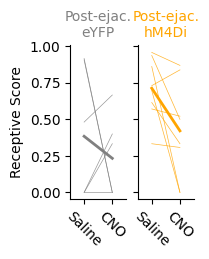

In [31]:
variable = 'Receptive_score'


tempdf = group_df[group_df.Experiment_type == 'SI']

xlen = 2
fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM4Di'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'Post-ejac.\nhM4Di'],['gray','orange'])]
axs[0].set_ylabel('Receptive Score')

fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')    


In [32]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Receptive_score
[0.6858304344516057, 0.0546875]
Post_ejaculatory_eYFP 1.0
Post_ejaculatory_hM4Di 0.109375


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Homecage assay

In [33]:
# Create a dataframe for home cage assay
homecage_summary_df = group_df[(group_df.Experiment_type == 'Homecage') & (group_df.drug == 'CNO')]

# Figure S11N

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7076\2741463085.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = homecage_summary_df,


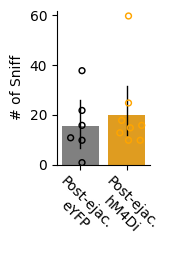

In [34]:
variable = 'Sniff_event'
figlabel = 'FigureS11N'

fig,axs = plt.subplots(1,1,figsize = (1.2,2))
sns.barplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Post_ejaculatory_hM4Di'],
            palette = ['gray','orange',],errwidth = 1, errcolor = 'black')
sns.swarmplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Post_ejaculatory_hM4Di'],
        facecolors='none',palette = ['black','orange'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xlabel('')
axs.set_ylabel('# of Sniff')
#[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Post-ejac.\nhM3Dq'],['gray','green','blue','orange'])]
axs.set_xticklabels(['Post-ejac.\neYFP','Post-ejac.\nhM4Di'],rotation = -45)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches ='tight')

In [35]:
from scipy.stats import mannwhitneyu

#perform two-way mannwhitneyu
group1 = 'eYFP'
group2 = 'hM4Di'

mannwhitneyu_stats = mannwhitneyu(x = homecage_summary_df[(homecage_summary_df.Group == group1)][variable].values,
        y = homecage_summary_df[(homecage_summary_df.Group == group2)][variable].values)

# Extract the test statistic and p-value
statistic,pvalue = mannwhitneyu_stats


print(variable,pvalue)





# Save the mannwhitneyu results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_mannwhitneyu.pickle'), 'wb') as handle:
    pickle.dump(mannwhitneyu_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_1 = len(homecage_summary_df[(homecage_summary_df.Group == group1)])
n_2 = len(homecage_summary_df[(homecage_summary_df.Group == group2)])

# Append the mannwhitneyu result to manuscript_statistic_file
mannwhitneyu_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Mann-Whitney U rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Sniff_event 0.6969476930319696


# Figure S11O

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7076\496896433.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = homecage_summary_df,
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


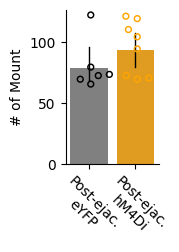

In [36]:
variable = 'Mount_event'
figlabel = 'FigureS11O'

fig,axs = plt.subplots(1,1,figsize = (1.2,2))
sns.barplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Post_ejaculatory_hM4Di'],
            palette = ['gray','orange',],errwidth = 1, errcolor = 'black')
sns.swarmplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Post_ejaculatory_hM4Di'],
        facecolors='none',palette = ['black','orange'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xlabel('')
axs.set_ylabel('# of Mount')
#[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Post-ejac.\nhM3Dq'],['gray','green','blue','orange'])]
axs.set_xticklabels(['Post-ejac.\neYFP','Post-ejac.\nhM4Di'],rotation = -45)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches ='tight')

In [37]:
from scipy.stats import mannwhitneyu

#perform two-way mannwhitneyu
group1 = 'eYFP'
group2 = 'hM4Di'

mannwhitneyu_stats = mannwhitneyu(x = homecage_summary_df[(homecage_summary_df.Group == group1)][variable].values,
        y = homecage_summary_df[(homecage_summary_df.Group == group2)][variable].values)

# Extract the test statistic and p-value
statistic,pvalue = mannwhitneyu_stats


print(variable,pvalue)





# Save the mannwhitneyu results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_mannwhitneyu.pickle'), 'wb') as handle:
    pickle.dump(mannwhitneyu_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_1 = len(homecage_summary_df[(homecage_summary_df.Group == group1)])
n_2 = len(homecage_summary_df[(homecage_summary_df.Group == group2)])

# Append the mannwhitneyu result to manuscript_statistic_file
mannwhitneyu_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Mann-Whitney U rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Mount_event 0.40034974287765923


# Figure S11P

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7076\3250399956.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = homecage_summary_df,


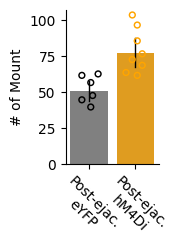

In [38]:
variable = 'Intromission_event'
figlabel = 'FigureS11P'

fig,axs = plt.subplots(1,1,figsize = (1.2,2))
sns.barplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Post_ejaculatory_hM4Di'],
            palette = ['gray','orange',],errwidth = 1, errcolor = 'black')
sns.swarmplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Post_ejaculatory_hM4Di'],
        facecolors='none',palette = ['black','orange'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xlabel('')
axs.set_ylabel('# of Mount')
#[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Post-ejac.\nhM3Dq'],['gray','green','blue','orange'])]
axs.set_xticklabels(['Post-ejac.\neYFP','Post-ejac.\nhM4Di'],rotation = -45)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches ='tight')

In [39]:
from scipy.stats import mannwhitneyu

#perform two-way mannwhitneyu
group1 = 'eYFP'
group2 = 'hM4Di'

mannwhitneyu_stats = mannwhitneyu(x = homecage_summary_df[(homecage_summary_df.Group == group1)][variable].values,
        y = homecage_summary_df[(homecage_summary_df.Group == group2)][variable].values)

# Extract the test statistic and p-value
statistic,pvalue = mannwhitneyu_stats


print(variable,pvalue)





# Save the mannwhitneyu results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_mannwhitneyu.pickle'), 'wb') as handle:
    pickle.dump(mannwhitneyu_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_1 = len(homecage_summary_df[(homecage_summary_df.Group == group1)])
n_2 = len(homecage_summary_df[(homecage_summary_df.Group == group2)])

# Append the mannwhitneyu result to manuscript_statistic_file
mannwhitneyu_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Mann-Whitney U rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Intromission_event 0.004464705671327198


# Figure S11Q

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_7076\2517235690.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data = homecage_summary_df,
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


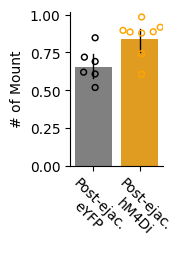

In [40]:
variable = 'Receptive_score'
figlabel = 'FigureS11Q'

fig,axs = plt.subplots(1,1,figsize = (1.2,2))
sns.barplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Post_ejaculatory_hM4Di'],
            palette = ['gray','orange',],errwidth = 1, errcolor = 'black')
sns.swarmplot(data = homecage_summary_df,
            x = 'Stim_Group',
            y = variable,
            ax = axs,
            order = ['Post_ejaculatory_eYFP','Post_ejaculatory_hM4Di'],
        facecolors='none',palette = ['black','orange'], marker="$\circ$", ec="face",s = 8)
sns.despine()
axs.set_xlabel('')
axs.set_ylabel('# of Mount')
#[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Post-ejac.\nhM3Dq'],['gray','green','blue','orange'])]
axs.set_xticklabels(['Post-ejac.\neYFP','Post-ejac.\nhM4Di'],rotation = -45)
fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),dpi = 216,bbox_inches ='tight')
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches ='tight')

In [41]:
from scipy.stats import mannwhitneyu

#perform two-way mannwhitneyu
group1 = 'eYFP'
group2 = 'hM4Di'

mannwhitneyu_stats = mannwhitneyu(x = homecage_summary_df[(homecage_summary_df.Group == group1)][variable].values,
        y = homecage_summary_df[(homecage_summary_df.Group == group2)][variable].values)

# Extract the test statistic and p-value
statistic,pvalue = mannwhitneyu_stats


print(variable,pvalue)





# Save the mannwhitneyu results to a .pickle file
with open(os.path.join(statspath, f'{figlabel}_mannwhitneyu.pickle'), 'wb') as handle:
    pickle.dump(mannwhitneyu_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Determine the sample size for each group (often shown as "n" in non-parametric tests)
n_1 = len(homecage_summary_df[(homecage_summary_df.Group == group1)])
n_2 = len(homecage_summary_df[(homecage_summary_df.Group == group2)])

# Append the mannwhitneyu result to manuscript_statistic_file
mannwhitneyu_data = pd.DataFrame([{
    'Figure': figlabel,
    'variable':variable,
    'Type of Test': 'Mann-Whitney U rank test',
    'Detail': f'{group1} vs {group2}',
    'statistic description': f'MW(n={n_1}, {n_2})',  # Showing "n" for each group
    'statistic': statistic,
    'p Value': pvalue
}])

# Concatenate to the results DataFrame
manuscript_statistic_file = pd.concat([manuscript_statistic_file, mannwhitneyu_data], ignore_index=True)

# Show the updated DataFrame
#print(manuscript_statistic_file)

Receptive_score 0.01998001998001998


In [42]:
# Write the stats
manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index = False)